<a href="https://colab.research.google.com/github/Celestia-Analytics/exoplanet-data-visualization/blob/Bina/exoplanet_trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction**

Exoplanet science is rapidly evolving: the number of confirmed exoplanets has grown dramatically, and new detection methods and surveys continually reshape what we can discover. This project builds an interactive, data-driven dashboard to visualize trends in exoplanet discoveries by year, by detection method, and by key planetary properties and to highlight the limitations and observational biases that shape those trends. By the end, we will be able to answer questions about when and how exoplanets are being discovered and what the main constraints are on current detection techniques. This project is going to be an add on to my Project 1 so we can see many similar plots but few additional parameters as well that are explored.


In [60]:
#Importing necessary library packages and getting the data using TAP API feature feom the NASA exoplanet data archive
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


url = "https://exoplanetarchive.ipac.caltech.edu/TAP/sync?query=select+pl_name,hostname,discoverymethod,disc_year,disc_locale,disc_facility,disc_telescope,disc_instrument,pl_rade+from+pscomppars&format=csv"
df = pd.read_csv(url)

I am going to use the same data source for this as well.

In [61]:
#check if there is any nulls in the data and cleaning it.
display(df.isnull().sum())

,0
pl_name,0
hostname,0
discoverymethod,0
disc_year,0
disc_locale,0
disc_facility,0
disc_telescope,0
disc_instrument,0
pl_rade,50


None of the columns that I chose has missing values beside the planetary radius. And it makes sense that not all the discovered exoplanets radius was also measured.
SInce this is a column with numeric value, I am just going to leave them as it is for now so that it wont interfere with other analysis and deal with this paticular one in the visualization.

In [62]:
df.head()

,pl_name,hostname,discoverymethod,disc_year,disc_locale,disc_facility,disc_telescope,disc_instrument,pl_rade
0,Kepler-1167 b,Kepler-1167,Transit,2016,Space,Kepler,0.95 m Kepler Telescope,Kepler CCD Array,1.710000
1,Kepler-1740 b,Kepler-1740,Transit,2021,Space,Kepler,0.95 m Kepler Telescope,Kepler CCD Array,3.323214
2,Kepler-1581 b,Kepler-1581,Transit,2016,Space,Kepler,0.95 m Kepler Telescope,Kepler CCD Array,0.800000
3,Kepler-644 b,Kepler-644,Transit,2016,Space,Kepler,0.95 m Kepler Telescope,Kepler CCD Array,3.150000
4,Kepler-1752 b,Kepler-1752,Transit,2021,Space,Kepler,0.95 m Kepler Telescope,Kepler CCD Array,4.540605


**Data Exploration**


In [63]:
# Total number of confirmed exoplanets in the dataset
total_planets = df.shape[0]
print("Total number of exoplanets in the dataset:", total_planets)

# List of all discovery methods used
discovery_methods = df['discoverymethod'].dropna().unique()
print("\nDiscovery Methods Used:")
for m in discovery_methods:
    print("-", m)

# Total number of observatories/facilities involved
observatories = df['disc_facility'].dropna().unique()
print("\nTotal number of observatories involved:", len(observatories))
print("List of Observatories:")
for o in observatories:
    print("-", o)


Total number of exoplanets in the dataset: 6053

Discovery Methods Used:
- Transit
- Radial Velocity
- Imaging
- Microlensing
- Pulsar Timing
- Transit Timing Variations
- Eclipse Timing Variations
- Orbital Brightness Modulation
- Astrometry
- Pulsation Timing Variations
- Disk Kinematics

Total number of observatories involved: 73
List of Observatories:
- Kepler
- La Silla Observatory
- HATNet
- K2
- CoRoT
- Las Campanas Observatory
- Next-Generation Transit Survey (NGTS)
- W. M. Keck Observatory
- Haute-Provence Observatory
- Multiple Observatories
- Paranal Observatory
- Anglo-Australian Telescope
- McDonald Observatory
- SuperWASP
- Bohyunsan Optical Astronomical Observatory
- Roque de los Muchachos Observatory
- Lick Observatory
- Transiting Exoplanet Survey Satellite (TESS)
- TrES
- MOA
- OGLE
- Arecibo Observatory
- Hubble Space Telescope
- Spitzer Space Telescope
- Gemini Observatory
- Yunnan Astronomical Observatory
- United Kingdom Infrared Telescope
- HATSouth
- KELT
- CHar

**Data Visualization**

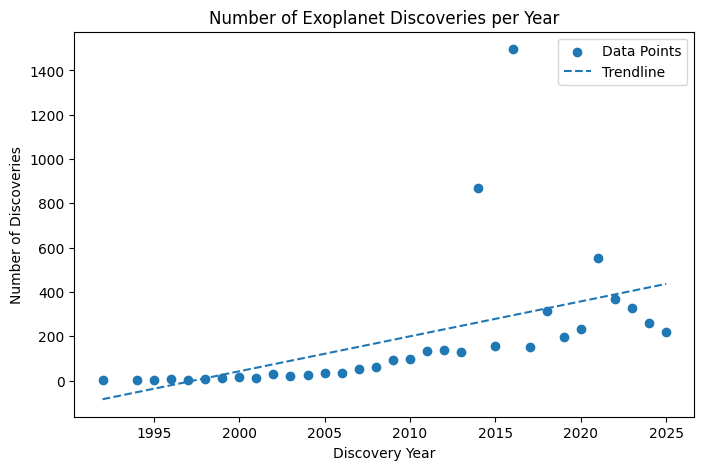

In [64]:
#Making a scatter plot for "Number of Discoveries per Year"
disc_year_counts = df['disc_year'].value_counts()
disc_year_df = disc_year_counts.reset_index()
disc_year_df.columns = ['disc_year', 'count']
disc_year_df = disc_year_df.sort_values(by='disc_year')

# Scatter plot
plt.figure(figsize=(8,5))
plt.scatter(disc_year_df['disc_year'], disc_year_df['count'], label='Data Points')
plt.xlabel("Discovery Year")
plt.ylabel("Number of Discoveries")
plt.title("Number of Exoplanet Discoveries per Year")

# Computeing trendline using linear regression
z = np.polyfit(disc_year_df['disc_year'], disc_year_df['count'], 1)
p = np.poly1d(z)
plt.plot(disc_year_df['disc_year'], p(disc_year_df['disc_year']),
         linestyle='--', label='Trendline')

plt.legend()
plt.show()


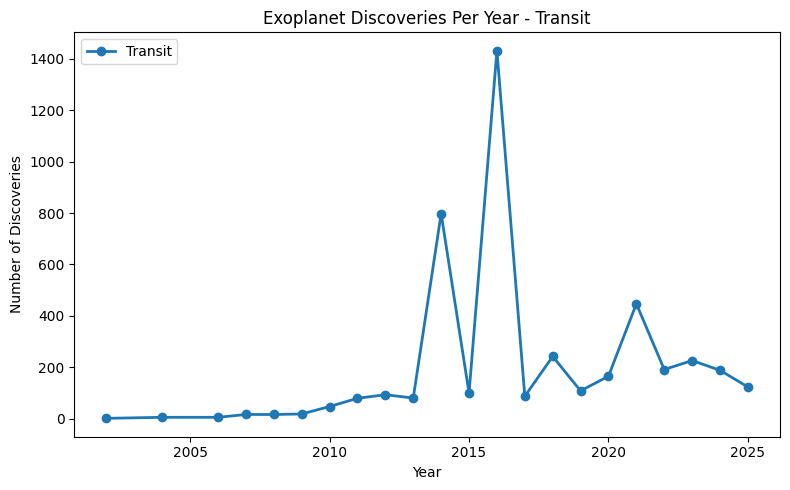

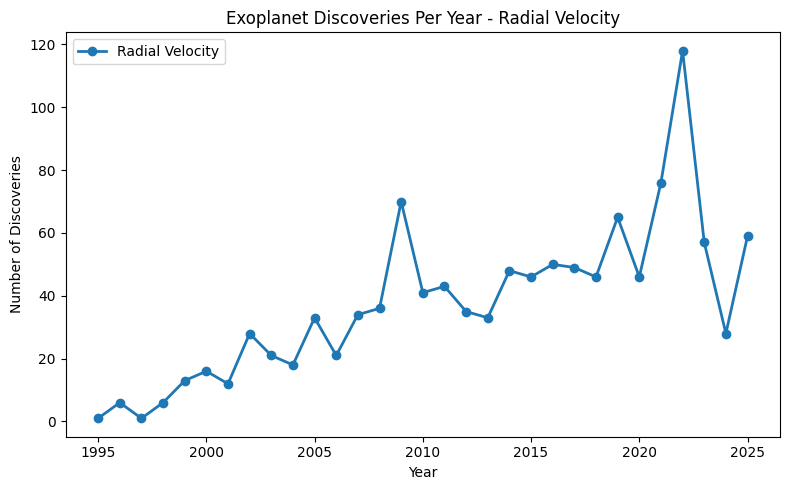

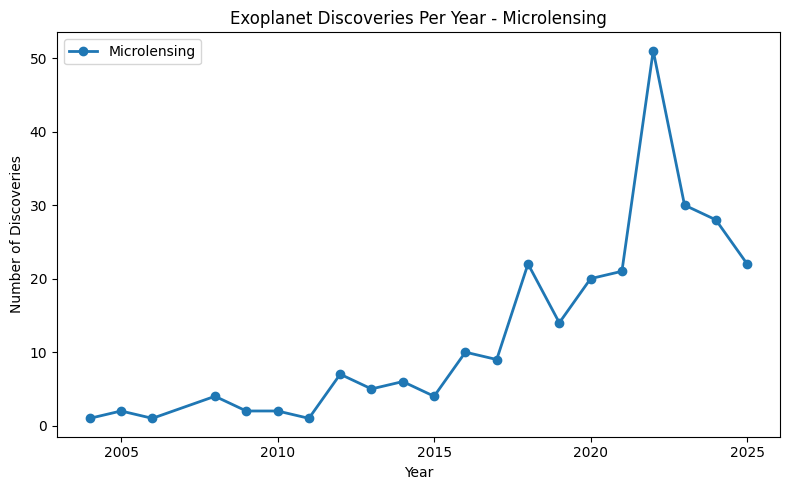

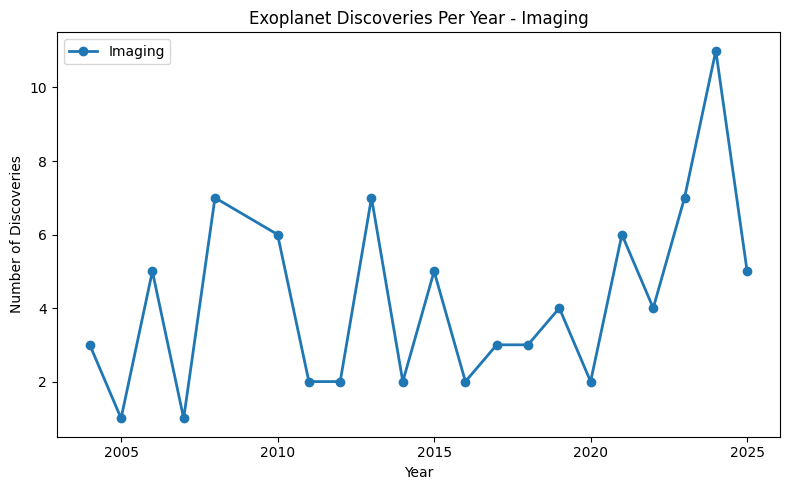

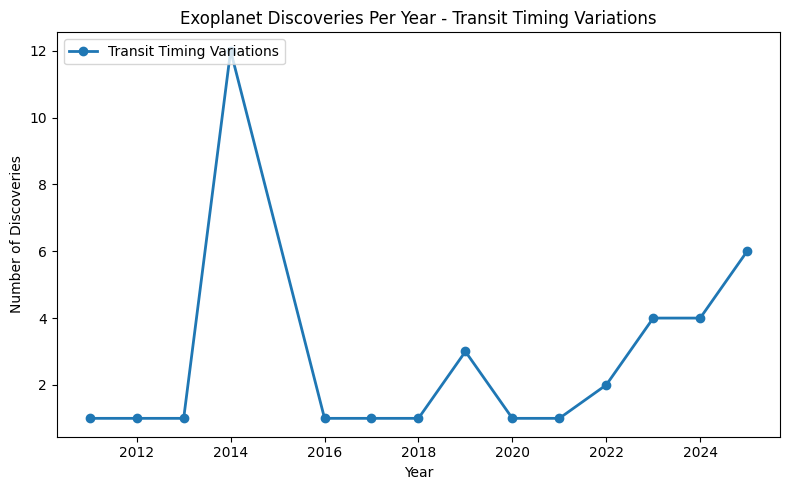

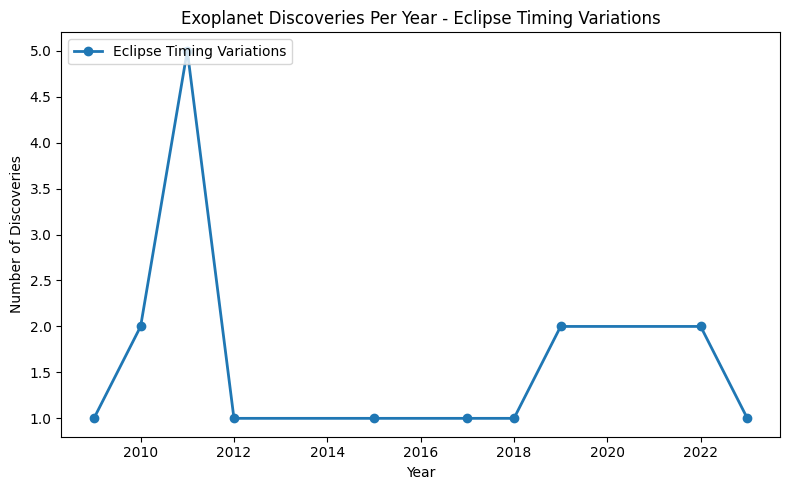

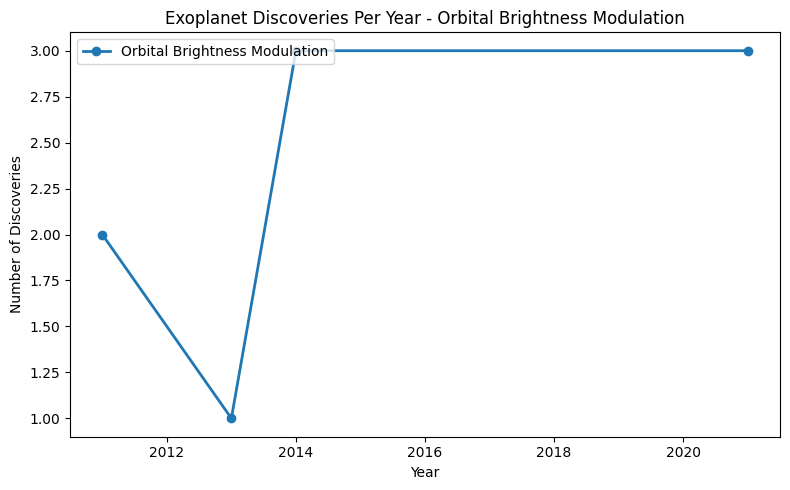

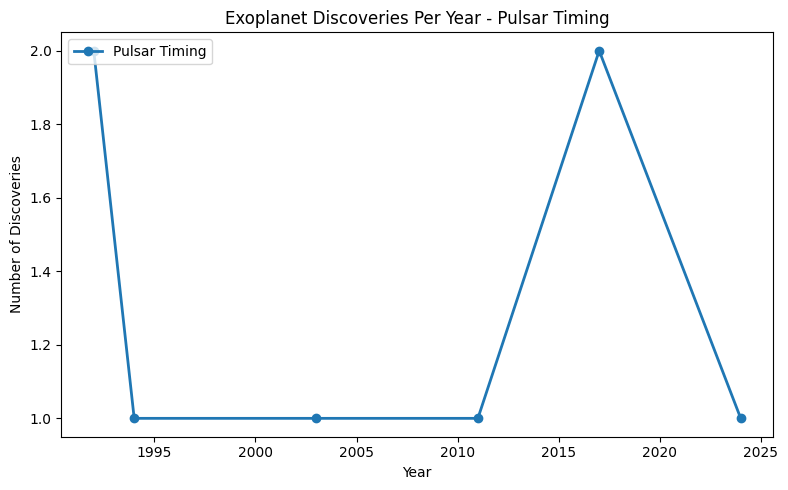

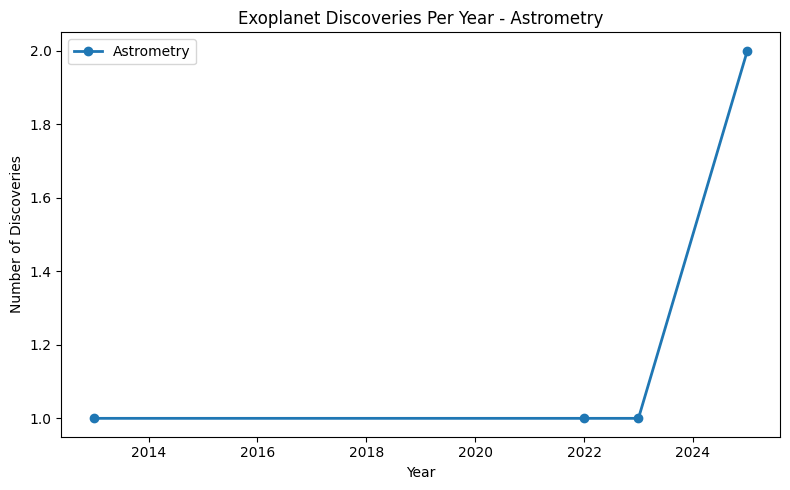

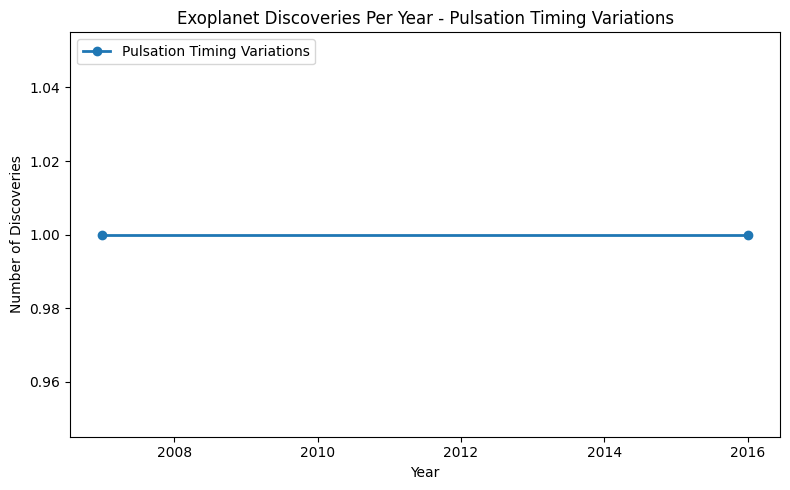

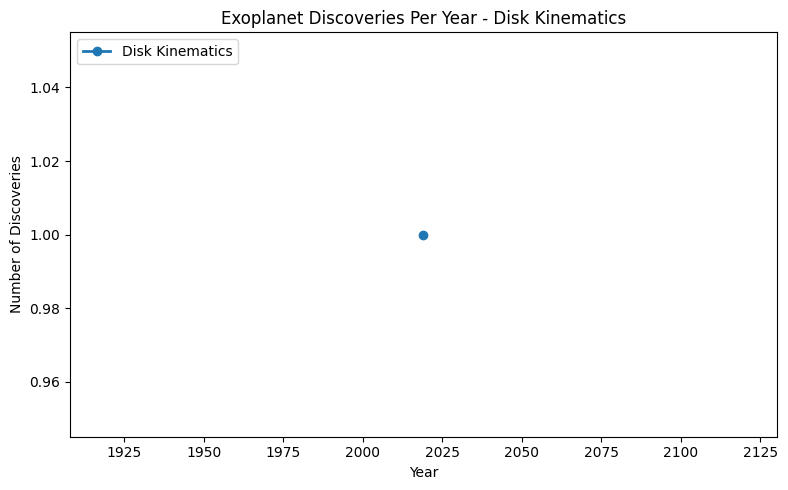

In [65]:
#Plotting the graph of number of planets discovered per year but by their detection methods.
grouped = df.groupby(['disc_year', 'discoverymethod']).size().reset_index(name='count')
method_totals = grouped.groupby('discoverymethod')['count'].sum().sort_values(ascending=False)
methods = method_totals.index.tolist()

# Loop to create ordered line plots
for method in methods:
    method_data = grouped[grouped['discoverymethod'] == method].sort_values(by='disc_year')

    plt.figure(figsize=(8,5))
    plt.plot(method_data['disc_year'], method_data['count'], linewidth=2, marker='o')

    plt.title(f'Exoplanet Discoveries Per Year - {method}')
    plt.xlabel('Year')
    plt.ylabel('Number of Discoveries')
    plt.grid(False)
    plt.legend([method], loc='upper left')
    plt.tight_layout()
    plt.show()



In [66]:
# Lets look at the top 5 most popular methods for exoplanet detection
discovery_method_counts = df['discoverymethod'].value_counts()
top_5_methods = discovery_method_counts.head(5)

top_5_methods

,count
discoverymethod,
Transit,4466
Radial Velocity,1156
Microlensing,262
Imaging,88
Transit Timing Variations,39


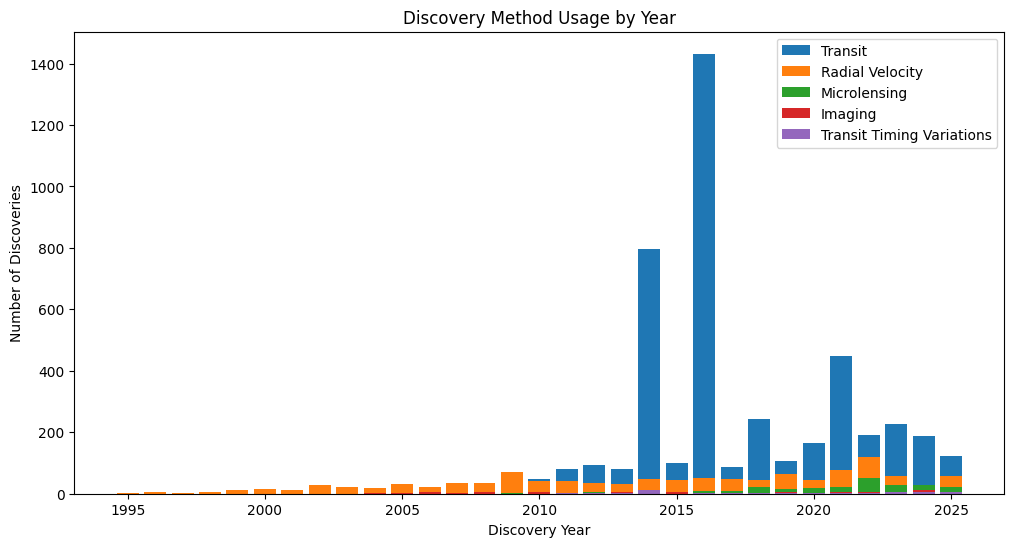

In [67]:
# Comparitive bar plot to graph the number of exoplanets discovered each year by each method for top 5 methods

microlensing_counts = df[df['discoverymethod'] == 'Microlensing'] ['disc_year'].value_counts()
microlensing_df = microlensing_counts.reset_index()
microlensing_df.columns = ['disc_year', 'count']

imaging_counts = df[df['discoverymethod'] == 'Imaging'] ['disc_year'].value_counts()
imaging_df = imaging_counts.reset_index()
imaging_df.columns = ['disc_year', 'count']

timing_counts = df[df['discoverymethod'] == 'Transit Timing Variations'] ['disc_year'].value_counts()
timing_df = timing_counts.reset_index()
timing_df.columns = ['disc_year', 'count']


plt.figure(figsize=(12, 6))
plt.bar(transit_df['disc_year'], transit_df['count'], label='Transit')
plt.bar(radialvelocity_df['disc_year'], radialvelocity_df['count'], label='Radial Velocity')
plt.bar(microlensing_df['disc_year'], microlensing_df['count'], label='Microlensing')
plt.bar(imaging_df['disc_year'], imaging_df['count'], label='Imaging')
plt.bar(timing_df['disc_year'], timing_df['count'], label='Transit Timing Variations')
plt.title("Discovery Method Usage by Year")
plt.xlabel("Discovery Year")
plt.ylabel("Number of Discoveries")
plt.legend()
plt.show()

<Figure size 1400x700 with 0 Axes>

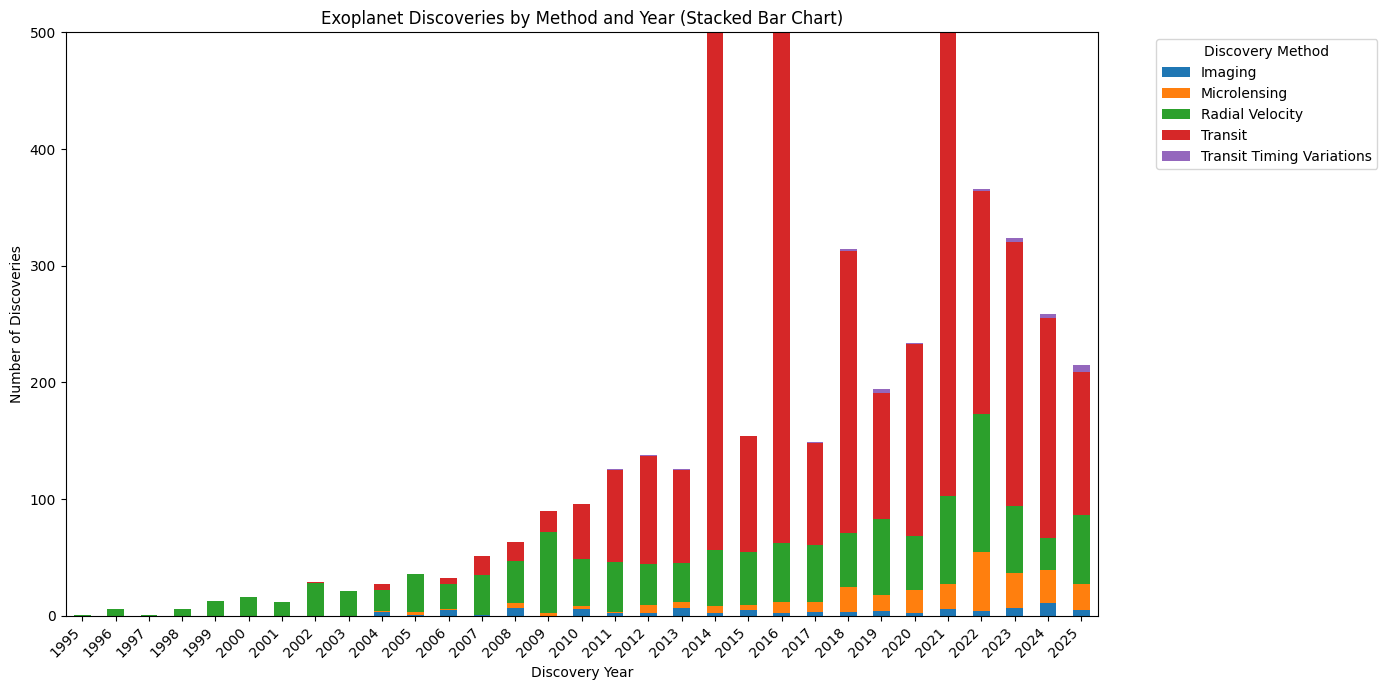

In [68]:
# Combine all discovery method dataframes
combined_df = pd.concat([
    transit_df.assign(discoverymethod='Transit'),
    radialvelocity_df.assign(discoverymethod='Radial Velocity'),
    microlensing_df.assign(discoverymethod='Microlensing'),
    imaging_df.assign(discoverymethod='Imaging'),
    timing_df.assign(discoverymethod='Transit Timing Variations')
])

# Pivot the combined dataframe to prepare for stacked bar plot
pivoted_df = combined_df.pivot_table(index='disc_year', columns='discoverymethod', values='count').fillna(0)

# Sort by discovery year for better visualization
pivoted_df = pivoted_df.sort_index()

# Plotting the stacked bar chart
plt.figure(figsize=(14, 7))
pivoted_df.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Exoplanet Discoveries by Method and Year (Stacked Bar Chart)')
plt.xlabel('Discovery Year')
plt.ylabel('Number of Discoveries')
plt.legend(title='Discovery Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 500) # Set the y-axis limit
plt.tight_layout()
plt.show()

The graphs above show the trends in exoplanet discoveries over time, separated by detection method and ordered by the total number of confirmed planets each method has contributed. Transit and Radial Velocity methods dominate the discoveries, especially after 2009 when dedicated missions such as NASA’s Kepler Space Telescope began operating. Transit detections show a sharp rise followed by sustained high discovery rates, reflecting the efficiency of space-based transit surveys. Radial Velocity also shows steady contributions, particularly in earlier years before the rise of transit missions. Methods such as Microlensing, Direct Imaging, and Pulsar Timing account for significantly fewer discoveries and show irregular or sporadic patterns. These trends highlight how technological advancements and observational strategies strongly influence detection outcomes, with the most effective methods enabling rapid growth in confirmed exoplanets

We will also be looking at the planets radius and the number of planets discovered.

In [69]:
# Since pl_rade has null values we are going to drop the columns with null value and then proceed
df = df.dropna(subset=['pl_rade'])


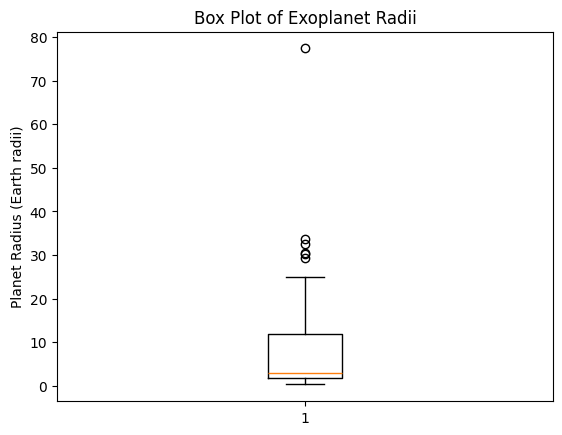

In [70]:

radius = df['pl_rade']

# Plot boxplot
plt.figure()
plt.boxplot(radius)
plt.ylabel('Planet Radius (Earth radii)')
plt.title('Box Plot of Exoplanet Radii')
plt.show()



The box plot provides a statistical summary of the distribution of planetary radii for all confirmed exoplanets in the dataset. Most planets have radii very close to that of Earth, indicating that many detected exoplanets fall within terrestrial or super-Earth size ranges. The median value lies close to 1 Earth radius, suggesting that half of the planets are smaller than or roughly comparable to Earth in size.

However, the distribution also shows a long tail toward much larger radii, representing gas giants, similar to or larger than Jupiter. These extreme values appear as clear outliers in the visualization. The box and whisker structure implies that while the majority of planets are relatively small, a smaller subset of discoveries includes massive planets, likely because larger gas giants are easier to detect using current techniques.

Overall, the box plot highlights that exoplanet discoveries span a large size range, but clusters strongly around Earth-like and super-Earth radii, with a small but significant population of very large planets.

**Conclusion**

In this project, I explored trends in exoplanet discoveries using data from NASA’s Exoplanet Archive. From the visualizations, it’s clear that the number of discoveries has increased a lot over time, especially after space missions like Kepler and TESS started operating. Transit and Radial Velocity are by far the most common methods for finding exoplanets, while other methods like Microlensing, Direct Imaging, and Pulsar Timing have fewer detections, which shows how technology and observational limitations affect what we can discover.

Looking at planetary radii, most exoplanets are Earth-sized or slightly bigger, with a smaller number of gas giants at much larger sizes. This makes sense because larger planets are generally easier to detect.

Overall, this project shows how visualizing data can reveal interesting patterns and trends in exoplanet research, and it highlights how detection methods and technology shape what we know about planets beyond our Solar System.